In [1]:
from wikiparse import geo_indexer, pipeline_utils as utils
from pandas import read_csv

In [2]:
from pathlib import Path
from wikiparse import config

xml_filename = config.xml
scratch_folder = Path(config.folder)

In [3]:
indexer = geo_indexer.Indexer(xml_filename,
            scratch_folder=scratch_folder)

opening C:\Users\rowan\Documents\geowiki\scratch\index.db
Ready. Metadata: [('size', 1524893)]


In [4]:
import time
pipeline_start = time.time()

In [5]:
df = read_csv(scratch_folder/'tfidf.csv', names=['idx', 'word', 'tf', 'article', 'df', 'tf_idf'])
del df['idx']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
len(df)

26598494

In [7]:
df.sample(5)

,word,tf,article,df,tf_idf
19625480,expeditionary,1,Brion Island,988,0.00101215
14547401,beh,1,Cheshivan,44,0.0227273
17512493,tulsa,7,Miss Belvedere,413,0.0169492
24406518,the,2,"Esmailabad, Saveh",581915,3.43693e-06
1598958,populations,1,North Carolina Department of Military and Vete...,4569,0.000218866


In [8]:
titles = set(df.article.unique())

In [9]:
gdf = utils.make_gdf(df, indexer)

getting lat,lon for each article
no pagenum in titles article
took 3.829 minutes
making geom vector
took 0.153 minutes
creating geodataframe


In [10]:
gdf.sample(5)

,word,tf,article,df,tf_idf,geometry
5607932,tuamotu,2,Hereheretue,103,0.0194175,POINT (-144.96278 -19.87222)
26193597,usa,1,Benjamin O. Davis High School,8858,0.000112892,POINT (-95.43308 29.95457)
25506443,an,1,"Washington Township, Carroll County, Iowa",277656,3.60158e-06,POINT (-95.03306 41.99306)
23670795,leonard,1,Gloucester Fisherman's Memorial,2300,0.000434783,POINT (-70.67139 42.61000)
20649452,barremian,3,Daiichi-Kashima Seamount,53,0.0566038,POINT (144.30000 34.20000)


In [11]:
gdf.to_pickle(scratch_folder/'gdf.pkl')

In [12]:
sample_size = min(len(gdf),100_000)

In [13]:
%matplotlib inline

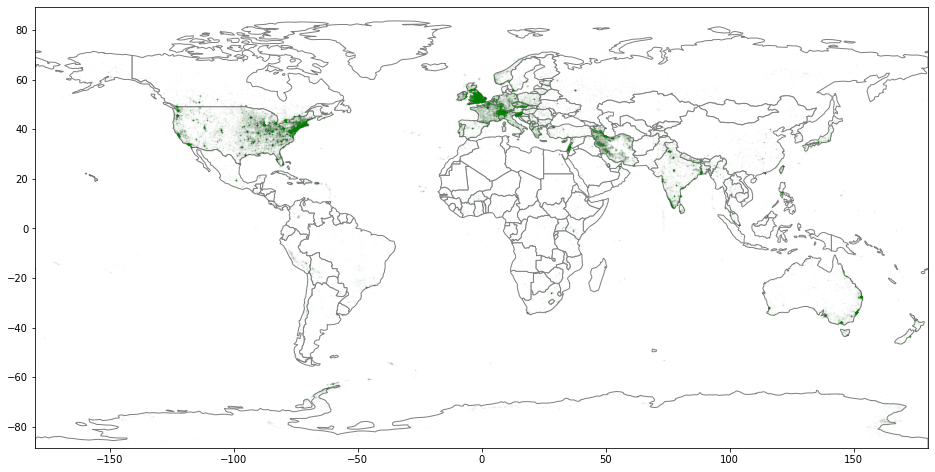

In [14]:
utils.map_gdf(gdf.sample(sample_size), alpha=0.01, markersize=1, c='g', 
              fname=scratch_folder/'sample_map.png')

In [15]:
took = time.time() - pipeline_start
if took < 60:
    print("pipeline took", round(took, 2), "seconds")
elif took < 3600:
    print("pipeline took", round(took/60, 2), "minutes")
else:
    print("pipeline took", round(took/60/60, 2), "hours")

pipeline took 5.48 minutes
